Feature selection (RFE con modello LogisticRegression)

# LOAD THE DATA

Creo un DataFrame pandas dal dataset _UNSW-NB15_:

In [72]:
import pandas as pd

# Apro i file CSV e creo un DataFrame
file_1 = pd.read_csv('UNSW-NB15_1.csv', header=None, low_memory=False)      # non hanno l'intestazione
file_2 = pd.read_csv('UNSW-NB15_2.csv', header=None, low_memory=False)      
file_3 = pd.read_csv('UNSW-NB15_3.csv', header=None, low_memory=False)      
file_4 = pd.read_csv('UNSW-NB15_4.csv', header=None, low_memory=False)      

# Concateno i quattro file verticalmente
df = pd.concat([file_1, file_2, file_3, file_4], axis=0, ignore_index=True)

In [73]:
# Sbircio la struttura
df.info

<bound method DataFrame.info of                    0      1               2      3    4    5         6     7   \
0          59.166.0.0   1390   149.171.126.6     53  udp  CON  0.001055   132   
1          59.166.0.0  33661   149.171.126.9   1024  udp  CON  0.036133   528   
2          59.166.0.6   1464   149.171.126.7     53  udp  CON  0.001119   146   
3          59.166.0.5   3593   149.171.126.5     53  udp  CON  0.001209   132   
4          59.166.0.3  49664   149.171.126.0     53  udp  CON  0.001169   146   
...               ...    ...             ...    ...  ...  ...       ...   ...   
2540042    59.166.0.5  33094   149.171.126.7  43433  tcp  FIN  0.087306   320   
2540043    59.166.0.7  20848   149.171.126.4     21  tcp  CON  0.365058   456   
2540044    59.166.0.3  21511   149.171.126.9     21  tcp  CON  6.335154  1802   
2540045    59.166.0.9  35433   149.171.126.0     80  tcp  CON  2.200934  3498   
2540046  175.45.176.0  17293  149.171.126.17    110  tcp  CON  0.942984   574

Il dataset non ha l'intestazione, dunque la aggiungo manualmente:

In [74]:
# Lista dei nomi delle features del dataset
features = [
            'srcip',        # source IP address
            'sport',        # source port number
            'dstip',        # destination IP address
            'dsport',       # destination port number
            'proto',        # transaction protocol
            'state',        # indicates to the state and its dependent protocol, e.g. ACC, CLO, CON, ECO, ECR, FIN, INT, MAS, PAR, REQ, RST, TST, TXD, URH, URN, and (-) (if not used state)
            'dur',          # record total duration
            'sbytes',       # source to destination transaction bytes
            'dbytes',       # destination to source transaction bytes
            'sttl',         # source to destination time to live value
            'dttl',         # destination to source time to live value
            'sloss',        # source packets retransmitted or dropped
            'dloss',        # destination packets retransmitted or dropped
            'service',      # http, ftp, smtp, ssh, dns, ftp-data, irc  and (-) if not much used service
            'Sload',        # source bits per second
            'Dload',        # destination bits per second
            'Spkts',        # source to destination packet count
            'Dpkts',        # destination to source packet count
            'swin',         # source TCP window advertisement value
            'dwin',         # destination TCP window advertisement value
            'stcpb',        # source TCP base sequence number
            'dtcpb',        # destination TCP base sequence number
            'smeansz',      # Mean of the ?ow packet size transmitted by the src 
            'dmeansz',      # Mean of the ?ow packet size transmitted by the dst
            'trans_depth',  # represents the pipelined depth into the connection of http request/response transaction
            'res_bdy_len',  # actual uncompressed content size of the data transferred from the server’s http service.
            'Sjit',         # source jitter (mSec)
            'Djit',         # destination jitter (mSec)
            'Stime',        # record start time
            'Ltime',        # record last time
            'Sintpkt',      # source interpacket arrival time (mSec)
            'Dintpkt',      # destination interpacket arrival time (mSec)
            'tcprtt',       # TCP connection setup round-trip time, the sum of ’synack’ and ’ackdat’
            'synack',       # TCP connection setup time, the time between the SYN and the SYN_ACK packets
            'ackdat',       # TCP connection setup time, the time between the SYN_ACK and the ACK packets
            'is_sm_ips_ports',      # if source (1) and destination (3)IP addresses equal and port numbers (2)(4)  equal then, this variable takes value 1 else 0
            'ct_state_ttl',         # No. for each state (6) according to specific range of values for source/destination time to live (10) (11)
            'ct_flw_http_mthd',     # No. of flows that has methods such as Get and Post in http service
            'is_ftp_login',         # If the ftp session is accessed by user and password then 1 else 0
            'ct_ftp_cmd',           # No of flows that has a command in ftp session
            'ct_srv_src',           # No. of connections that contain the same service (14) and source address (1) in 100 connections according to the last time (26)
            'ct_srv_dst',           # No. of connections that contain the same service (14) and destination address (3) in 100 connections according to the last time (26)
            'ct_dst_ltm',           # No. of connections of the same destination address (3) in 100 connections according to the last time (26)
            'ct_src_ltm',           # No. of connections of the same source address (1) in 100 connections according to the last time (26)
            'ct_src_dport_ltm',     # No of connections of the same source address (1) and the destination port (4) in 100 connections according to the last time (26)
            'ct_dst_sport_ltm',     # No of connections of the same destination address (3) and the source port (2) in 100 connections according to the last time (26)
            'ct_dst_src_ltm',       # No of connections of the same source (1) and the destination (3) address in in 100 connections according to the last time (26)
            'attack_cat',           # The name of each attack category. In this data set , nine categories e.g. Fuzzers, Analysis, Backdoors, DoS Exploits, Generic, Reconnaissance, Shellcode and Worms
            'Label'                 # 0 for normal and 1 for attack records
            ]

In [75]:
# Aggiungo i nomi delle feature come intestazione del DataFrame
df.columns = features

# Salvo il dataset con le intestazioni
df.to_csv('UNSW-NB15.csv', index=True)

# Verifico
df.head(50)

,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,...,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat,Label
0,59.166.0.0,1390,149.171.126.6,53,udp,CON,0.001055,132,164,31,...,0,3,7,1,3,1,1,1,NaN,0
1,59.166.0.0,33661,149.171.126.9,1024,udp,CON,0.036133,528,304,31,...,0,2,4,2,3,1,1,2,NaN,0
2,59.166.0.6,1464,149.171.126.7,53,udp,CON,0.001119,146,178,31,...,0,12,8,1,2,2,1,1,NaN,0
3,59.166.0.5,3593,149.171.126.5,53,udp,CON,0.001209,132,164,31,...,0,6,9,1,1,1,1,1,NaN,0
4,59.166.0.3,49664,149.171.126.0,53,udp,CON,0.001169,146,178,31,...,0,7,9,1,1,1,1,1,NaN,0
5,59.166.0.0,32119,149.171.126.9,111,udp,CON,0.078339,568,312,31,...,0,2,4,2,3,1,1,2,NaN,0
6,59.166.0.6,2142,149.171.126.4,53,udp,CON,0.001134,132,164,31,...,0,12,7,1,2,2,1,1,NaN,0
7,10.40.182.3,0,10.40.182.3,0,arp,INT,0.000000,46,0,0,...,0,2,2,2,2,2,2,2,NaN,0
8,59.166.0.5,40726,149.171.126.6,53,udp,CON,0.001126,146,178,31,...,0,6,7,3,1,1,1,1,NaN,0
9,59.166.0.7,12660,149.171.126.4,53,udp,CON,0.001167,132,164,31,...,0,6,7,2,1,1,1,1,NaN,0


In [76]:
# Verifico se le ho inserite tutte (devono essere 49)
len(df.columns)

49

# HANDLE TARGET FEATURE

Studio le due colonne dei target: la binaria che rappresenta se una certa istanza è un attacco o meno, e quella multiclasse che contiene il tipo di attacco specifico.

In [77]:
# Analizzo la colonna dei target multiclasse
df['attack_cat'].unique()

array([nan, 'Exploits', 'Reconnaissance', 'DoS', 'Generic', 'Shellcode',
       ' Fuzzers', 'Worms', 'Backdoors', 'Analysis', ' Reconnaissance ',
       'Backdoor', ' Fuzzers ', ' Shellcode '], dtype=object)

Bisogna effettuare una pulizia sul DataFrame: ci sono categorie duplicate a causa della presenza di spazi. 

In [78]:
# Rimuovo gli spazi in eccesso da tutte le colonne
df = df.map(lambda x: x.strip() if isinstance(x, str) else x)

# Trasformo "Backdoor" in "Backdoors" in tutte le colonne
df = df.replace('Backdoor', 'Backdoors')

# Elimino i duplicati nel DataFrame
df = df.drop_duplicates()

# Verifico
df['attack_cat'].unique()

array([nan, 'Exploits', 'Reconnaissance', 'DoS', 'Generic', 'Shellcode',
       'Fuzzers', 'Worms', 'Backdoors', 'Analysis'], dtype=object)

Nella feature "attack_cat" le istanze che non rappresentano attacchi hanno valore nan, le sostituisco con qualcosa di più significativo:

In [79]:
# Sostituisco i valori NaN con la stringa 'Benign'
df['attack_cat'].fillna('Benign', inplace=True)

# Verifico
df['attack_cat'].unique()

/tmp/ipykernel_27431/133206995.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['attack_cat'].fillna('Benign', inplace=True)


array(['Benign', 'Exploits', 'Reconnaissance', 'DoS', 'Generic',
       'Shellcode', 'Fuzzers', 'Worms', 'Backdoors', 'Analysis'],
      dtype=object)

In [80]:
# Analizzo la colonna dei target binari
df['Label'].unique()

array([0, 1])

Controllo quanti positivi ci sono all'interno del DataFrame e la distribuzione fra le diverse categorie:

In [81]:
# Osservo il numero di occorrenze dei positivi
df["Label"].value_counts()

Label
0    1959772
1      99643
Name: count, dtype: int64

In [82]:
# Per avere un'idea più precisa guardo in percentuale come sono distribuiti
percentuali = df["Label"].value_counts(normalize=True) * 100
percentuali = percentuali.round(2)  # Arrotondo a due cifre decimali
print(percentuali)

Label
0    95.16
1     4.84
Name: proportion, dtype: float64


In [83]:
# Osservo il numero di occorrenze per ogni tipo di attacco
df["attack_cat"].value_counts()

attack_cat
Benign            1959772
Exploits            27599
Generic             25378
Fuzzers             21795
Reconnaissance      13357
DoS                  5665
Analysis             2184
Backdoors            1983
Shellcode            1511
Worms                 171
Name: count, dtype: int64

Rimuovo i target dal DataFrame:

In [84]:
# Target multiclasse
labels = df['attack_cat']
df.drop('attack_cat', axis=1, inplace=True)

In [85]:
# Target binari
labels_binary = df['Label']
df.drop('Label', axis=1, inplace=True)

# TIMESTAMP FEATURE

Analizzo le due feature che rappresentano il Timestamp per capire ogni quanto sono state fatte le osservazioni sul traffico di rete.

### TAKE A QUICK LOOK

In [86]:
df["Stime"].head(50)    # Record start time

0     1421927414
1     1421927414
2     1421927414
3     1421927414
4     1421927414
5     1421927414
6     1421927414
7     1421927415
8     1421927415
9     1421927415
10    1421927415
13    1421927415
14    1421927415
15    1421927415
16    1421927415
17    1421927415
18    1421927415
19    1421927415
20    1421927415
21    1421927416
22    1421927414
23    1421927416
24    1421927416
25    1421927416
26    1421927416
27    1421927416
28    1421927416
29    1421927416
30    1421927416
31    1421927416
32    1421927417
33    1421927417
34    1421927417
35    1421927417
36    1421927417
37    1421927417
38    1421927417
39    1421927417
40    1421927418
41    1421927418
42    1421927418
43    1421927418
44    1421927418
45    1421927418
46    1421927418
47    1421927418
48    1421927418
49    1421927418
50    1421927419
51    1421927419
Name: Stime, dtype: int64

In [87]:
df["Ltime"].head(50)    # Record last time

0     1421927414
1     1421927414
2     1421927414
3     1421927414
4     1421927414
5     1421927414
6     1421927414
7     1421927415
8     1421927415
9     1421927415
10    1421927415
13    1421927415
14    1421927415
15    1421927415
16    1421927415
17    1421927415
18    1421927415
19    1421927415
20    1421927415
21    1421927416
22    1421927416
23    1421927416
24    1421927416
25    1421927416
26    1421927416
27    1421927416
28    1421927416
29    1421927416
30    1421927416
31    1421927416
32    1421927417
33    1421927417
34    1421927417
35    1421927417
36    1421927417
37    1421927417
38    1421927417
39    1421927417
40    1421927418
41    1421927418
42    1421927418
43    1421927418
44    1421927418
45    1421927418
46    1421927418
47    1421927418
48    1421927418
49    1421927418
50    1421927419
51    1421927419
Name: Ltime, dtype: int64

### CONVERT TO DATETIME

Le due feature che rappresentano lo start time e il last time dovrebbero essere di tipo Timestamp ma sono di tipo intero (Unix epoch). Le trasformo in Timestamp.

In [88]:
# Converto la colonna Stime in datetime
df['Stime'] = pd.to_datetime(df['Stime'], unit='s')

df['Stime'].head(50)

0    2015-01-22 11:50:14
1    2015-01-22 11:50:14
2    2015-01-22 11:50:14
3    2015-01-22 11:50:14
4    2015-01-22 11:50:14
5    2015-01-22 11:50:14
6    2015-01-22 11:50:14
7    2015-01-22 11:50:15
8    2015-01-22 11:50:15
9    2015-01-22 11:50:15
10   2015-01-22 11:50:15
13   2015-01-22 11:50:15
14   2015-01-22 11:50:15
15   2015-01-22 11:50:15
16   2015-01-22 11:50:15
17   2015-01-22 11:50:15
18   2015-01-22 11:50:15
19   2015-01-22 11:50:15
20   2015-01-22 11:50:15
21   2015-01-22 11:50:16
22   2015-01-22 11:50:14
23   2015-01-22 11:50:16
24   2015-01-22 11:50:16
25   2015-01-22 11:50:16
26   2015-01-22 11:50:16
27   2015-01-22 11:50:16
28   2015-01-22 11:50:16
29   2015-01-22 11:50:16
30   2015-01-22 11:50:16
31   2015-01-22 11:50:16
32   2015-01-22 11:50:17
33   2015-01-22 11:50:17
34   2015-01-22 11:50:17
35   2015-01-22 11:50:17
36   2015-01-22 11:50:17
37   2015-01-22 11:50:17
38   2015-01-22 11:50:17
39   2015-01-22 11:50:17
40   2015-01-22 11:50:18
41   2015-01-22 11:50:18


In [89]:
# Converto la colonna Ltime in datetime
df['Ltime'] = pd.to_datetime(df['Ltime'], unit='s')

df['Ltime'].head(50)

0    2015-01-22 11:50:14
1    2015-01-22 11:50:14
2    2015-01-22 11:50:14
3    2015-01-22 11:50:14
4    2015-01-22 11:50:14
5    2015-01-22 11:50:14
6    2015-01-22 11:50:14
7    2015-01-22 11:50:15
8    2015-01-22 11:50:15
9    2015-01-22 11:50:15
10   2015-01-22 11:50:15
13   2015-01-22 11:50:15
14   2015-01-22 11:50:15
15   2015-01-22 11:50:15
16   2015-01-22 11:50:15
17   2015-01-22 11:50:15
18   2015-01-22 11:50:15
19   2015-01-22 11:50:15
20   2015-01-22 11:50:15
21   2015-01-22 11:50:16
22   2015-01-22 11:50:16
23   2015-01-22 11:50:16
24   2015-01-22 11:50:16
25   2015-01-22 11:50:16
26   2015-01-22 11:50:16
27   2015-01-22 11:50:16
28   2015-01-22 11:50:16
29   2015-01-22 11:50:16
30   2015-01-22 11:50:16
31   2015-01-22 11:50:16
32   2015-01-22 11:50:17
33   2015-01-22 11:50:17
34   2015-01-22 11:50:17
35   2015-01-22 11:50:17
36   2015-01-22 11:50:17
37   2015-01-22 11:50:17
38   2015-01-22 11:50:17
39   2015-01-22 11:50:17
40   2015-01-22 11:50:18
41   2015-01-22 11:50:18


Gli elementi delle colonne Stime e Ltime sono uguali, dunque vuol dire che ogni osservazione dura meno di un secondo. Dal momento che la rappresentazione Unix non contiene l'informazione riguardo ai microsecondi o nanosecondi, non si riesce a capire in che unità di misura sia la colonna 'dur' (Record total duration).

### SORT CHRONOLOGICALLY

Ordino cronologicamente il DataFrame:

In [90]:
# Ordino il DataFrame in base alla colonna 'Stime'
df_sorted = df.sort_values(by='Stime')

# Visualizzo i primi 50 valori ordinati
df_sorted.head(50)

,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,...,ct_flw_http_mthd,is_ftp_login,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm
119,10.40.182.1,0,224.0.0.5,0,ospf,INT,50.004337,384,0,1,...,0.0,0.0,0,2,4,4,2,2,4,2
120,10.40.85.1,0,224.0.0.5,0,ospf,INT,50.004341,384,0,1,...,0.0,0.0,0,2,4,4,2,2,4,2
221,192.168.241.243,259,192.168.241.243,49320,icmp,URH,0.000000,1780,0,64,...,0.0,0.0,0,2,2,2,2,1,1,2
222,192.168.241.243,49320,192.168.241.243,0xc0a8,icmp,URH,0.000000,1780,0,64,...,0.0,0.0,0,2,2,2,2,1,1,2
261,59.166.0.6,50089,149.171.126.9,80,tcp,FIN,28.680214,1052,824,31,...,0.0,0.0,0,4,3,5,4,4,1,1
309,59.166.0.5,6645,149.171.126.2,80,tcp,FIN,29.268066,1052,824,31,...,0.0,0.0,0,6,10,7,4,4,1,1
320,59.166.0.0,3231,149.171.126.5,80,tcp,FIN,28.789330,1052,824,31,...,0.0,0.0,0,6,4,10,7,6,1,2
525,10.40.85.30,0,10.40.85.1,0,arp,CON,30.788803,138,84,0,...,0.0,0.0,0,2,2,2,2,2,2,2
526,10.40.182.1,0,10.40.182.3,0,arp,CON,31.328632,56,92,0,...,0.0,0.0,0,2,2,2,2,2,2,2
838,59.166.0.3,42587,149.171.126.8,25,tcp,FIN,34.077175,37358,3380,31,...,0.0,0.0,0,1,1,12,10,1,1,2


### TOTAL OBSERVATION TIME OF TRAFFIC FLOW

Calcolo il periodo totale di osservazione:

In [91]:
# Trovo il timestamp minimo e massimo
min_timestamp = df['Stime'].min()
max_timestamp = df['Stime'].max()

# Calcolo la durata totale
duration = max_timestamp - min_timestamp

print(f"Il periodo totale di osservazione è: {duration}")

Il periodo totale di osservazione è: 27 days 00:31:31


# CREATE TEST SET AND VAL SET

Suddivido il DataFrame in training set (60%), test set (20%) e validation set(20%).

In [92]:
from sklearn.model_selection import train_test_split

# Prima suddivisione: dividere il dataset in training set e test set
X_train, X_test, y_train, y_test = train_test_split(df, labels, test_size=0.2, random_state=42)

# Seconda suddivisione: dividere il training set rimanente in training set e validation set
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

# Verifico la shape
print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)

(1235649, 47) (1235649,)
(411883, 47) (411883,)
(411883, 47) (411883,)


# CLEAN THE DATA

In [93]:
import numpy as np
import matplotlib.pyplot as plt

### BLANK VALUES

Gestisco eventuali valori vuoti nel DataFrame:

In [94]:
# Conto il numero di valori vuoti in ciascuna colonna
empty_count_per_column = X_train.map(lambda x: x == '').sum()

# Filtro le colonne con valori vuoti maggiori di zero
empty_count_per_column_nonzero = empty_count_per_column[empty_count_per_column > 0]

# Stampo solo le colonne con valori vuoti
print("Valori vuoti per colonna (solo colonne con valori vuoti):")
print(empty_count_per_column_nonzero)


Valori vuoti per colonna (solo colonne con valori vuoti):
ct_ftp_cmd    608614
dtype: int64


La feature 'ct_ftp_cmd' presenta 608614 istanze che hanno come valore la stringa vuota, decido di sostituirle con il valore più ricorrente.

In [95]:
# Individuo il valore più ricorrente
X_train['ct_ftp_cmd'].value_counts()

ct_ftp_cmd
     608614
0    378088
0    224900
1     17376
1      6129
2       124
3       122
4        95
6        63
5        58
4        49
2        30
8         1
Name: count, dtype: int64

Definisco e applico la funzione desiderata:

In [96]:
# Funzione per trasformare stringhe vuote in zero
def blank_values_to_0(blank):
    if blank == "":
        return 0
    else:
        return blank
    
# Applico la funzione alla colonna 'ct_ftp_cmd' del DataFrame
X_train['ct_ftp_cmd'] = X_train['ct_ftp_cmd'].apply(blank_values_to_0)

# Verifico
X_train['ct_ftp_cmd'].value_counts()

ct_ftp_cmd
0    986702
0    224900
1     17376
1      6129
2       124
3       122
4        95
6        63
5        58
4        49
2        30
8         1
Name: count, dtype: int64

### NAN VALUES

In [97]:
# Verifico la presenza di valori NaN per ciascuna colonna
nan_count_per_column = X_train.isna().sum()

# Filtro le colonne con valori NaN maggiori di zero
nan_count_nonzero = nan_count_per_column[nan_count_per_column > 0]

# Stampo solo le colonne con valori NaN
print("Valori NaN per colonna (solo colonne con NaN):")
print(nan_count_nonzero)

Valori NaN per colonna (solo colonne con NaN):
ct_flw_http_mthd    560638
is_ftp_login        608614
dtype: int64


Indago la feature 'is_ftp_login':

In [98]:
X_train['is_ftp_login'].unique()

array([nan,  0.,  1.,  4.,  2.])

In [99]:
X_train['is_ftp_login'].value_counts()

is_ftp_login
0.0    603042
1.0     23935
4.0        49
2.0         9
Name: count, dtype: int64

Dovrebbe avere come valori univoci solo 0 e 1, decido di scartare l'intera feature perchè non è coerente con la descrizione del dataset e perchè i valori NaN sono circa il 50%:

In [100]:
# Rimuovo la colonna
X_train = X_train.drop('is_ftp_login', axis=1)

Indago la feature 'ct_flw_http_mthd':

In [101]:
X_train['ct_flw_http_mthd'].value_counts()

ct_flw_http_mthd
0.0     555952
1.0     112399
6.0       3012
4.0       2585
3.0        357
2.0        305
5.0        150
9.0         74
14.0        73
12.0        45
8.0         19
36.0        12
10.0        11
16.0         9
30.0         6
25.0         2
Name: count, dtype: int64

Anche in questo caso i valori Nan sono circa il 50% dunque decido di rimuovere l'intera feature:

In [102]:
# Rimuovo la colonna
X_train = X_train.drop('ct_flw_http_mthd', axis=1)

# NUMERICAL AND CATEGORICAL FEATURES

In [103]:
import numpy as np

Studio le feature una ad una per capire quali sono categoriche e quali sono numeriche.

### SRCIP , DSTIP

In [104]:
# Guardo i valori univoci
srcip = X_train["srcip"].unique()
print(srcip)

['59.166.0.6' '59.166.0.8' '59.166.0.1' '59.166.0.7' '59.166.0.5'
 '175.45.176.2' '59.166.0.3' '59.166.0.9' '59.166.0.0' '59.166.0.4'
 '59.166.0.2' '175.45.176.0' '175.45.176.1' '175.45.176.3'
 '149.171.126.10' '149.171.126.12' '10.40.85.30' '149.171.126.15'
 '10.40.170.2' '10.40.85.1' '10.40.182.1' '10.40.182.3' '10.40.85.10'
 '149.171.126.18' '149.171.126.3' '149.171.126.14' '149.171.126.7'
 '149.171.126.4' '149.171.126.5' '149.171.126.6' '149.171.126.13'
 '149.171.126.2' '149.171.126.0' '149.171.126.9' '192.168.241.243'
 '149.171.126.8' '149.171.126.1' '149.171.126.11' '149.171.126.19'
 '10.40.182.6' '149.171.126.17' '149.171.126.16' '127.0.0.1']


In [105]:
# Stampo il numero di valori univoci
len(srcip)

43

In [106]:
dstip = X_train["dstip"].unique()
print(dstip)

['149.171.126.8' '149.171.126.0' '149.171.126.5' '149.171.126.9'
 '149.171.126.4' '149.171.126.1' '149.171.126.14' '149.171.126.2'
 '149.171.126.7' '149.171.126.6' '149.171.126.3' '149.171.126.13'
 '149.171.126.12' '149.171.126.18' '175.45.176.0' '149.171.126.17'
 '149.171.126.16' '149.171.126.15' '149.171.126.10' '10.40.85.1'
 '175.45.176.3' '149.171.126.19' '10.40.170.2' '224.0.0.5'
 '149.171.126.11' '10.40.182.3' '175.45.176.1' '10.40.85.30' '59.166.0.0'
 '59.166.0.3' '59.166.0.9' '192.168.241.50' '59.166.0.6' '59.166.0.2'
 '59.166.0.1' '59.166.0.7' '192.168.241.243' '59.166.0.8' '59.166.0.5'
 '59.166.0.4' '10.40.198.10' '32.50.32.66' '224.0.0.1' '10.40.182.255'
 '175.45.176.2' '10.40.182.6' '127.0.0.1']


In [107]:
# Stampo il numero di valori univoci
len(dstip)

47

I source ip e i destination ip hanno cardinalità simile, vediamo quanti sono gli elementi non in comune:

In [108]:
# Calcolo il num di elementi che stanno in dstip ma non in srcip
diff1 = np.setdiff1d(dstip, srcip)
len(diff1)

6

In [109]:
# Calcolo il num di elementi che stanno in srcip ma non in dstip
diff2 = np.setdiff1d(srcip, dstip)
len(diff2)

2

I due set hanno quasi tutti i valori in comune, dunque possiamo applicare un one-hot-encoding creando un unico insieme di valori univoci che contenga tutti i valori presenti in entrambe le feature.

In [110]:
# Trasformo i due array in set per poter applicare l'unione
srcip_set = set(srcip)
dstip_set = set(dstip)

# Crea un insieme comune di valori unici
ip_common_values = list(srcip_set.union(dstip_set))

len(ip_common_values)

49

### SPORT, DSPORT

In [111]:
# La colonna sport presenta degli spazi bianchi su alcuni elementi, questo falsa l'output di value_counts() quindi li rimuovo
X_train["sport"] = X_train["sport"].str.strip()


In [112]:
# Guardo il numero di valori univoci
sport_unique = X_train["sport"].unique()
dsport_unique = X_train["dsport"].unique()

print("Valori univoci per la feature sport:", len(sport_unique))
print("Valori univoci per la feature dsport:", len(dsport_unique))

Valori univoci per la feature sport: 64330
Valori univoci per la feature dsport: 64467


I valori univoci sono troppi per essere convertiti direttamente in one-hot, dunque controllo le occorrenze:

In [113]:
# Guardo le occorrenze dei valori univoci
sport = X_train["sport"].value_counts()

print(sport)

sport
0        2654
47439    1381
1043     1322
80        167
53         85
         ... 
4634        1
25924       1
19553       1
61086       1
34395       1
Name: count, Length: 64329, dtype: int64


Decido di creare 5 categorie per la sport: una per ognuna delle 4 porte più ricorrenti e una per le restanti porte.

In [114]:
def trasforma_sport(port):
    if port in ['0', '47439', '1043', '80']:
        return port
    else:
        return 'Other'

# Applico la funzione alla colonna 'sport' del DataFrame
X_train['sport'] = X_train['sport'].apply(trasforma_sport)

# Verifico
X_train['sport'].value_counts()

sport
Other    1230125
0           2654
47439       1381
1043        1322
80           167
Name: count, dtype: int64

In [115]:
# Guardo le occorrenze de valori univoci
dsport = X_train["dsport"].value_counts()

print(dsport)

dsport
53       241380
80       130731
6881      72819
5190      69453
111       55408
          ...  
31060         1
37487         1
31683         1
4578          1
12375         1
Name: count, Length: 64467, dtype: int64


Decido di creare 12 categorie: una per ognuna delle 11 porte più ricorrenti e una per le restanti porte.

In [116]:
def trasforma_dsport(port):
    if port in ['53', '80', '6881', '5190', '111', '25', '22', '143', '21', '0', '179']:
        return port
    else:
        return 'Other'

# Applico la funzione alla colonna 'dsport' del DataFrame
X_train['dsport'] = X_train['dsport'].apply(trasforma_dsport)

# Verifico
X_train['dsport'].value_counts()

dsport
Other    502608
53       241380
80       130731
6881      72819
5190      69453
111       55408
25        51767
22        29579
143       29532
21        28057
0         13193
179       11122
Name: count, dtype: int64

### PROTO

In [117]:
# Guardo i valori univoci
proto_unique = X_train["proto"].unique()
print(proto_unique)
print("\nNumero di valori univoci per la feature 'proto':", len(proto_unique))

['tcp' 'udp' 'unas' 'mobile' 'arp' 'ospf' 'ipv6-route' 'mfe-nsp'
 'nsfnet-igp' 'trunk-1' 'mhrp' 'icmp' 'wb-mon' 'eigrp' 'etherip'
 'wb-expak' 'br-sat-mon' 'ipv6-opts' 'encap' 'prm' 'emcon' 'ttp'
 'ipx-n-ip' 'sctp' 'srp' 'netblt' 'xns-idp' 'swipe' 'any' 'pup' 'sep'
 'mtp' 'cpnx' 'gmtp' 'micp' 'leaf-1' 'bbn-rcc' 'ipv6-no' 'isis' 'iso-tp4'
 'ipnip' 'cftp' 'vrrp' 'ipip' 'pipe' 'zero' 'snp' 'ifmp' 'hmp' 'trunk-2'
 'pgm' 'crtp' 'sun-nd' 'rsvp' 'idrp' 'a/n' 'xtp' 'secure-vmtp' 'aris'
 'egp' 'vines' 'tp++' 'ippc' 'ipcomp' 'ib' 'rvd' 'fc' 'igp' 'dgp' 'uti'
 'idpr' 'pri-enc' 'ipv6-frag' 'igmp' 'ddx' 'smp' 'sdrp' 'ddp' 'skip' 'ggp'
 'st2' 'ipv6' 'sps' 'dcn' 'crudp' 'scps' 'narp' 'ax.25' 'sat-mon' 'ip'
 'tcf' 'argus' 'idpr-cmtp' 'iso-ip' 'gre' 'i-nlsp' 'irtp' 'stp' 'sm' 'pim'
 'xnet' 'mux' 'cbt' 'bna' 'chaos' 'kryptolan' 'ipcv' 'qnx' 'fire'
 'merit-inp' 'il' 'compaq-peer' 'visa' 'sccopmce' 'rdp' '3pc' 'tlsp' 'wsn'
 'nvp' 'larp' 'sprite-rpc' 'cphb' 'iplt' 'vmtp' 'aes-sp3-d' 'iatp' 'ptp'
 'sat-expak

Anche in questo caso sono troppi per renderli direttamente categorici, vediamo come procedere:

In [118]:
proto = X_train["proto"].value_counts()
print(proto)

proto
tcp            869425
udp            352769
arp              3970
unas             2833
ospf             2369
                ...  
kryptolan          20
compaq-peer        20
udt                 4
rtp                 4
esp                 1
Name: count, Length: 135, dtype: int64


In [119]:
def trasforma_proto(proto):
    if proto in ['tcp', 'udp', 'arp', 'unas', 'ospf']:
        return proto
    else:
        return 'Other'

# Applico la funzione alla colonna 'proto' del DataFrame
X_train['proto'] = X_train['proto'].apply(trasforma_proto)

# Verifico
X_train['proto'].value_counts()

proto
tcp      869425
udp      352769
Other      4283
arp        3970
unas       2833
ospf       2369
Name: count, dtype: int64

### STATE

In [120]:
# Guardo i valori univoci
state_unique = X_train["state"].unique()
print(state_unique)
print("\nNumero di valori univoci per la feature 'state':", len(state_unique))

['FIN' 'CON' 'INT' 'REQ' 'CLO' 'RST' 'ECO' 'URH' 'PAR' 'ACC' 'ECR' 'MAS'
 'no' 'TXD' 'TST' 'URN']

Numero di valori univoci per la feature 'state': 16


Essendo 16 valori univoci posso trasformarli direttamente in categorici. Prima di fare ciò però sostituisco le istanze con valore 'no' in 'no_state' (sono le istanze in cui non viene usato alcuno stato):

In [121]:
def trasforma_state(state):
    if state == 'no':
        return 'no_state'
    else:
        return state

# Applico la funzione alla colonna 'state' del DataFrame
X_train['state'] = X_train['state'].apply(trasforma_state)

# Verifico
X_train['state'].value_counts()

state
FIN         860174
CON         326047
INT          45082
REQ           3608
RST            319
ECO            195
CLO             95
URH             59
ACC             26
PAR             15
MAS              6
no_state         5
URN              5
TXD              5
ECR              4
TST              4
Name: count, dtype: int64

### SERVICE

In [122]:
# Guardo i valori univoci
service_unique = X_train["service"].unique()
print(service_unique)
print("\nNumero di valori univoci per la feature 'service':", len(service_unique))

['-' 'dns' 'http' 'ssh' 'ftp' 'smtp' 'ftp-data' 'snmp' 'pop3' 'dhcp' 'ssl'
 'radius' 'irc']

Numero di valori univoci per la feature 'service': 13


Trasformo le istanze con valore '-' in 'no_service' per maggiore chiarezza:

In [123]:
def trasforma_service(service):
    if service == '-':
        return 'no_service'
    else:
        return service

# Applico la funzione alla colonna 'service' del DataFrame
X_train['service'] = X_train['service'].apply(trasforma_service)

# Verifico
X_train['service'].value_counts()

service
no_service    701727
dns           231760
http          121801
ftp-data       75015
smtp           48787
ssh            28134
ftp            27226
pop3             931
ssl               83
snmp              70
dhcp              69
radius            24
irc               22
Name: count, dtype: int64

### ONE-HOT-ENCODING 

In [124]:
from sklearn.preprocessing import OneHotEncoder

Per poter applicare le giuste trasformazioni, definisco due liste: una per le feature numeriche e una per le feature categoriche:

In [125]:
# feature categoriche
cat_attributes = ['dstip', 'srcip', 'sport', 'dsport', 'proto', 'state', 'service', 'is_sm_ips_ports']

# features numeriche
num_attributes = ['dur', 'sbytes', 'dbytes', 'sttl', 'dttl', 'sloss', 'dloss', 'Sload', 'Dload', 'Spkts', 'Dpkts', 'swin', 'dwin', 'stcpb', 'dtcpb',
                  'smeansz', 'dmeansz', 'trans_depth', 'res_bdy_len', 'Sjit', 'Djit', 'Sintpkt', 'Dintpkt', 'tcprtt', 'synack', 'ackdat',
                  'ct_ftp_cmd', 'ct_srv_src', 'ct_srv_dst', 'ct_dst_ltm', 'ct_src_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm',
                  'ct_state_ttl']

# !!! DROPPATE: 'ct_flw_http_mthd' , 'is_ftp_login'

Converto le feature numeriche:

In [126]:
# Setto il tipo delle numeriche a float (in modo che siano uniformi)
X_train[num_attributes] = X_train[num_attributes].astype(float)

Gestisco le feature categoriche:

In [128]:
# Configuro One-Hot-Encoder in modo che mi venga restituito un pandas df
cat_encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False).set_output(transform='pandas')

# Inizializzo un DataFrame vuoto per concatenare i risultati
encoded_features = pd.DataFrame(index=X_train.index)

# Addestro l'encoder su tutte le feature categoriche 
cat_encoder.fit(X_train[cat_attributes])

# Applico la trasformazione ad ogni feature categorica 
# (va fatto insieme e non con un ciclo for, altrimenti l'encoder pensa che mancano delle categorie)
encoded_features = cat_encoder.transform(X_train[cat_attributes])

# Visualizzo il risultato
encoded_features.head()

,dstip_10.40.170.2,dstip_10.40.182.255,dstip_10.40.182.3,dstip_10.40.182.6,dstip_10.40.198.10,dstip_10.40.85.1,dstip_10.40.85.30,dstip_127.0.0.1,dstip_149.171.126.0,dstip_149.171.126.1,...,service_irc,service_no_service,service_pop3,service_radius,service_smtp,service_snmp,service_ssh,service_ssl,is_sm_ips_ports_0,is_sm_ips_ports_1
1184382,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1176184,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1557110,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
582887,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2289711,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [129]:
# Droppo le vecchie feature categoriche
X_train_dropped = X_train.drop(columns=cat_attributes)

# Concateno il vecchio DataFrame senza le feature categoriche con il nuovo DataFrame encodato
X_train_encoded = pd.concat([X_train_dropped, encoded_features], axis=1)

# Verifico
X_train_encoded.head()


,dur,sbytes,dbytes,sttl,dttl,sloss,dloss,Sload,Dload,Spkts,...,service_irc,service_no_service,service_pop3,service_radius,service_smtp,service_snmp,service_ssh,service_ssl,is_sm_ips_ports_0,is_sm_ips_ports_1
1184382,0.366781,7810.0,14946.0,31.0,29.0,30.0,32.0,1.689510e+05,3.234192e+05,122.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1176184,0.076865,4222.0,63010.0,31.0,29.0,7.0,30.0,4.333832e+05,6.469420e+06,72.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1557110,0.022045,2646.0,24330.0,31.0,29.0,7.0,15.0,9.373554e+05,8.628896e+06,42.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
582887,0.001149,146.0,178.0,31.0,29.0,0.0,0.0,5.082681e+05,6.196692e+05,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2289711,0.004637,3736.0,2456.0,31.0,29.0,7.0,7.0,6.088419e+06,4.002588e+06,18.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


Verifico che il numero di colonne dopo la concatenazione (181) sia il valore che mi aspettavo:

In [130]:
# Sommo il numero di feature numeriche al numero di categorie per le feature categoriche 
print(len(num_attributes) +
      2 + #stime, ltime
      2 + #is_sm_ips_ports
      13 + #service
      16 + #state
      6 + #proto
      12 + #dsport
      5 + #sport
      43 + #srcip
      47 #dstip
)

181


# FEATURE SCALING

In [131]:
from sklearn.preprocessing import MinMaxScaler

In [132]:
# Seleziono solo le colonne numeriche nella copia del df, così da poterle visualizzare meglio sul grafico
X_train_num = X_train_encoded.loc[:, num_attributes]

Osservo le feature prima della standardizzazione:

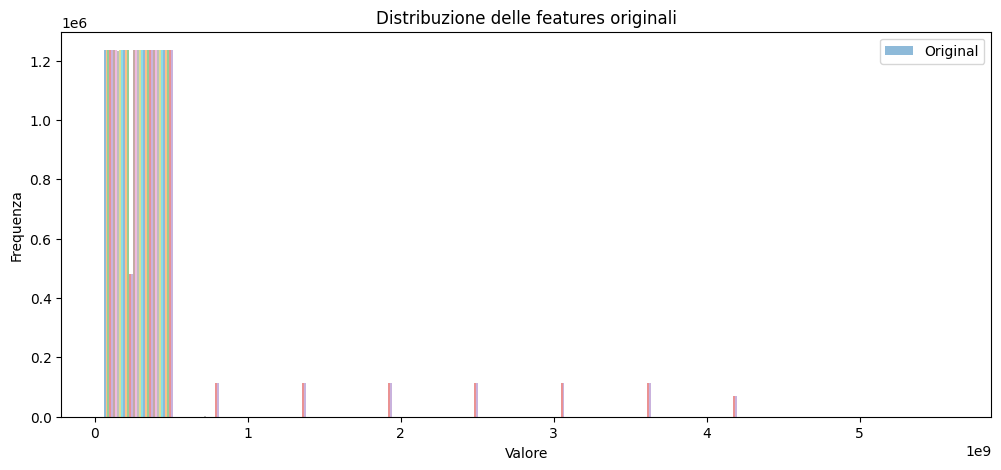

In [133]:
# Grafico dell'istogramma delle features originali
plt.figure(figsize=(12, 5))
plt.hist(X_train_num, bins=10, alpha=0.5, label='Original')
plt.title('Distribuzione delle features originali')
plt.xlabel('Valore')
plt.ylabel('Frequenza')
plt.legend()
plt.show()

Ora applico la standardizzazione a tutte le feature numeriche:

In [134]:
min_max_scaler = MinMaxScaler()
X_train_encoded[num_attributes] = min_max_scaler.fit_transform(X_train_encoded[num_attributes])

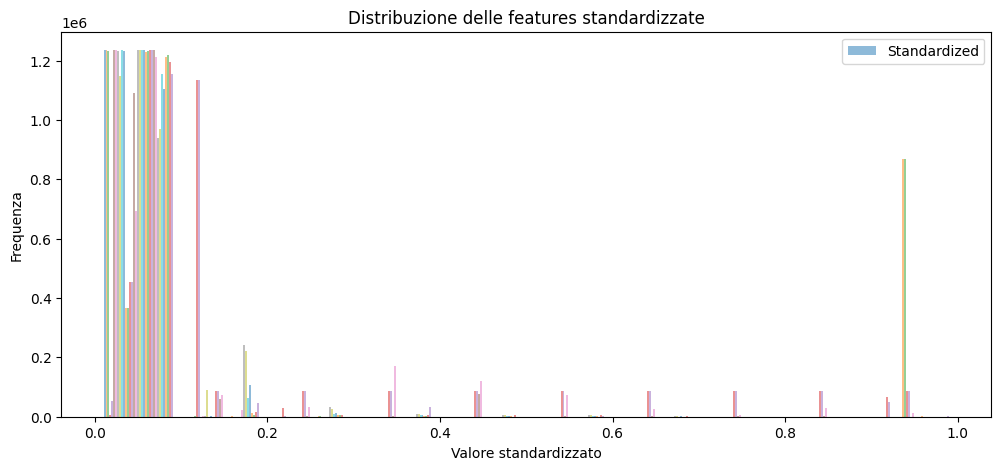

In [135]:
# Grafico dell'istogramma delle features standardizzate
plt.figure(figsize=(12, 5))
plt.hist(X_train_encoded[num_attributes], bins=10, alpha=0.5, label='Standardized')
plt.title('Distribuzione delle features standardizzate')
plt.xlabel('Valore standardizzato')
plt.ylabel('Frequenza')
plt.legend()
plt.show()

# FEATURE SELECTION

Seleziono le feature più rilevanti utilizzando la RFE (Recursive Feature Elimination). Questa tecnica consiste nel provare ad addestrare un estimatore selezionando ricorsivamente set sempre più piccoli di feature, andando così a capire quali possono essere scartate e quali invece vanno conservate. 

In [64]:
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold

### VERSIONE LOGISTIC REGRESSION (FUNZIONANTE)

RFE Selector processa solo interi o float, dunque sistemo le colonne con tipo diverso.

Droppo le colonne di tipo Timestamp poichè non supportate:

In [136]:
# Rimuovo le colonne
X_train_encoded.drop('Stime', axis=1, inplace=True)
X_train_encoded.drop('Ltime', axis=1, inplace=True)

Converto la colonna dei target facendo sì che ogni elemento valga 0 se l'attacco è benigno e 1 se è maligno (qualsiasi esso sia):

In [65]:
# Sostituisco i valori di y_train con valori numerici 
y_train_encoded = y_train.replace({'Benign': 0, 'Reconnaissance': 1, 'Analysis': 1, 'Exploits': 1, 'Generic':1,
                                   'Fuzzers': 1, 'DoS': 1, 'Shellcode': 1, 'Backdoors': 1, 'Worms': 1})

/tmp/ipykernel_27431/977180334.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_train_encoded = y_train.replace({'Benign': 0, 'Reconnaissance': 1, 'Analysis': 1, 'Exploits': 1, 'Generic':1,


Per poter utilizzare la RFE devo creare un estimatore che sia coerente con il mio scopo. Scelgo un estimatore di tipo LogisticRegression poichè adatto al compito di classificazione. La cosa ideale sarebbe utilizzare una LSTM, dal momento che rappresenta il modello che userò successivamente. Nel fare questo sorgerebbero però dei problemi dovuti alla shape del DataFrame: la LSTM ha infatti bisogno di un input in 3D, mentre la RFE si aspetta un input in 2D.

In [68]:
# Inizializzo l'estimatore utilizzando la classe LogisticRegression di scikit-learn
estimator = LogisticRegression()        # Problema di classificazione (no LinearRegression perchè è regressione)

Il classico uso di RFE prevede la scelta del parametro 'n_features_to_select'. In sostanza ci permette di specificare il numero fisso n di featured che si vogliono selezionare, e rfe si occuperà di scegliere le migliori n features fra quelle totali.
Non sapendo però quale sia il numero ideale di feature da selezionare per questo dataset, usiamo la validazione incrociata. Questa permette di delegare la scelta del numero ottimale di feature alla RFECV, che le determinarà automaticamente basandosi sulle prestazioni del modello, riducendo il rischio di overfitting e migliorando la capacità del modello di generalizzare su nuovi dati.

Utilizziamo una particolare versione di validazione incrociata, ovvero quella stratificata (StratifiedKFold). Questo metodo mantiene la proporzione delle classi uguale in ogni suddivisione, garantendo che ogni fold della validazione incrociata sia rappresentativo della distribuzione delle classi originali.

In [69]:
# Utilizzo StratifiedKFold per la validazione incrociata
cv = StratifiedKFold(n_splits=5)        # 5 è il valore di default

Scelgo come passo di eliminazione delle caratteristiche il valore 1 (step=1), che significa che una caratteristica verrà rimossa ad ogni iterazione. Il punteggio utilizzato per valutare le prestazioni è l'accuratezza.

In [70]:
# Inizializzo RFECV con la validazione incrociata
rfecv = RFECV(estimator=estimator, step=1, cv=cv, scoring='accuracy')

# Eseguo fit su X_train_encoded e y_train_encoded: RFECV elimina ricorsivamente le caratteristiche meno importanti
rfecv = rfecv.fit(X_train_encoded, y_train_encoded)

Stampo il risultato di RFECV:

In [71]:
# Numero ottimale di feature selezionate
print("Numero ottimale di feature selezionate:", rfecv.n_features_)

# Le maschere booleane che indicano le feature selezionate: 
# (True o False) per ciascuna caratteristica, indicando se la caratteristica 
# è stata selezionata (True) o eliminata (False).
print("Maschere booleane delle feature selezionate:", rfecv.support_)

# Ranking delle caratteristiche 
# ogni numero in questo array rappresenta il "rango" di una caratteristica: 
# un valore di 1 indica che la caratteristica è stata selezionata,
# mentre numeri maggiori indicano l'ordine in cui le caratteristiche sono state eliminate.
print("Ranking delle feature:", rfecv.ranking_)

Numero ottimale di feature selezionate: 123
Maschere booleane delle feature selezionate: [False  True  True  True  True  True  True  True  True  True  True  True
  True False False False  True False False  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
 False  True False  True False False False  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True False  True False False  True  True  True
 False False False False False False False False False False  True  True
  True False  True  True False False False False  True False  True False
  True  True False False  True False False False False False False False
 False False  True  True  True  True False  True  True  True  True  True
  True  True  True  True  True  True  True  True False  True  True  True
  True  True  True  True  True  True False  True  True  True False  True
  True  True False  True False Fals

In [76]:
# Prendo i nomi delle feature dal DataFrame
feature_names = X_train_encoded.columns

# Converto l'output in una lista
selected_feature_names = list(feature_names[rfecv.support_])

print("Nomi delle feature selezionate:")
      
# Stampo tutte le feature
for feature in selected_feature_names:
    print(feature)

Nomi delle feature selezionate:
sbytes
dbytes
sttl
dttl
sloss
dloss
Sload
Dload
Spkts
Dpkts
swin
dwin
dmeansz
Sjit
Djit
Sintpkt
Dintpkt
tcprtt
synack
ackdat
ct_state_ttl
ct_ftp_cmd
ct_srv_src
ct_srv_dst
ct_dst_ltm
ct_src_ltm
ct_src_dport_ltm
ct_dst_sport_ltm
ct_dst_src_ltm
dstip_10.40.170.2
dstip_10.40.182.3
dstip_10.40.198.10
dstip_149.171.126.0
dstip_149.171.126.1
dstip_149.171.126.10
dstip_149.171.126.11
dstip_149.171.126.12
dstip_149.171.126.13
dstip_149.171.126.14
dstip_149.171.126.15
dstip_149.171.126.16
dstip_149.171.126.17
dstip_149.171.126.18
dstip_149.171.126.19
dstip_149.171.126.2
dstip_149.171.126.3
dstip_149.171.126.4
dstip_149.171.126.5
dstip_149.171.126.6
dstip_149.171.126.7
dstip_149.171.126.8
dstip_149.171.126.9
dstip_175.45.176.0
dstip_175.45.176.1
dstip_175.45.176.3
dstip_224.0.0.1
dstip_224.0.0.5
dstip_32.50.32.66
srcip_10.40.170.2
srcip_10.40.182.1
srcip_10.40.182.3
srcip_10.40.85.1
srcip_10.40.85.10
srcip_149.171.126.10
srcip_149.171.126.12
srcip_149.171.126.14
sr

In [74]:
# Calcolo la differenza tra tutte le feature originali e le feature selezionate da rfecv
non_selected_feature_names = feature_names[~rfecv.support_]

print("Nomi delle feature non selezionate:", non_selected_feature_names)

print(len(non_selected_feature_names))

Nomi delle feature non selezionate: Index(['dur', 'stcpb', 'dtcpb', 'smeansz', 'trans_depth', 'res_bdy_len',
       'dstip_10.40.182.255', 'dstip_10.40.182.6', 'dstip_10.40.85.1',
       'dstip_10.40.85.30', 'dstip_127.0.0.1', 'dstip_175.45.176.2',
       'dstip_192.168.241.243', 'dstip_192.168.241.50', 'dstip_59.166.0.0',
       'dstip_59.166.0.1', 'dstip_59.166.0.2', 'dstip_59.166.0.3',
       'dstip_59.166.0.4', 'dstip_59.166.0.5', 'dstip_59.166.0.6',
       'dstip_59.166.0.7', 'dstip_59.166.0.8', 'dstip_59.166.0.9',
       'srcip_10.40.182.6', 'srcip_10.40.85.30', 'srcip_127.0.0.1',
       'srcip_149.171.126.0', 'srcip_149.171.126.1', 'srcip_149.171.126.11',
       'srcip_149.171.126.13', 'srcip_149.171.126.16', 'srcip_149.171.126.17',
       'srcip_149.171.126.19', 'srcip_149.171.126.2', 'srcip_149.171.126.3',
       'srcip_149.171.126.4', 'srcip_149.171.126.5', 'srcip_149.171.126.6',
       'srcip_149.171.126.7', 'srcip_149.171.126.8', 'srcip_149.171.126.9',
       'srcip_192.168

Creo una lista con le feature selezionate, in modo da non dover runnare tutto da capo ogni volta:

In [137]:
selected_features = [
    'sbytes',
    'dbytes',
    'sttl',
    'dttl',
    'sloss',
    'dloss',
    'Sload',
    'Dload',
    'Spkts',
    'Dpkts',
    'swin',
    'dwin',
    'dmeansz',
    'Sjit',
    'Djit',
    'Sintpkt',
    'Dintpkt',
    'tcprtt',
    'synack',
    'ackdat',
    'ct_state_ttl',
    'ct_ftp_cmd',
    'ct_srv_src',
    'ct_srv_dst',
    'ct_dst_ltm',
    'ct_src_ltm',
    'ct_src_dport_ltm',
    'ct_dst_sport_ltm',
    'ct_dst_src_ltm',
    'dstip_10.40.170.2',
    'dstip_10.40.182.3',
    'dstip_10.40.198.10',
    'dstip_149.171.126.0',
    'dstip_149.171.126.1',
    'dstip_149.171.126.10',
    'dstip_149.171.126.11',
    'dstip_149.171.126.12',
    'dstip_149.171.126.13',
    'dstip_149.171.126.14',
    'dstip_149.171.126.15',
    'dstip_149.171.126.16',
    'dstip_149.171.126.17',
    'dstip_149.171.126.18',
    'dstip_149.171.126.19',
    'dstip_149.171.126.2',
    'dstip_149.171.126.3',
    'dstip_149.171.126.4',
    'dstip_149.171.126.5',
    'dstip_149.171.126.6',
    'dstip_149.171.126.7',
    'dstip_149.171.126.8',
    'dstip_149.171.126.9',
    'dstip_175.45.176.0',
    'dstip_175.45.176.1',
    'dstip_175.45.176.3',
    'dstip_224.0.0.1',
    'dstip_224.0.0.5',
    'dstip_32.50.32.66',
    'srcip_10.40.170.2',
    'srcip_10.40.182.1',
    'srcip_10.40.182.3',
    'srcip_10.40.85.1',
    'srcip_10.40.85.10',
    'srcip_149.171.126.10',
    'srcip_149.171.126.12',
    'srcip_149.171.126.14',
    'srcip_149.171.126.15',
    'srcip_149.171.126.18',
    'srcip_175.45.176.0',
    'srcip_175.45.176.1',
    'srcip_175.45.176.2',
    'srcip_175.45.176.3',
    'srcip_59.166.0.0',
    'srcip_59.166.0.1',
    'srcip_59.166.0.2',
    'srcip_59.166.0.3',
    'srcip_59.166.0.4',
    'srcip_59.166.0.5',
    'srcip_59.166.0.6',
    'srcip_59.166.0.7',
    'srcip_59.166.0.8',
    'srcip_59.166.0.9',
    'sport_0',
    'sport_1043',
    'sport_47439',
    'sport_Other',
    'dsport_0',
    'dsport_111',
    'dsport_143',
    'dsport_179',
    'dsport_21',
    'dsport_22',
    'dsport_25',
    'dsport_5190',
    'dsport_6881',
    'dsport_80',
    'dsport_Other',
    'proto_arp',
    'proto_ospf',
    'proto_tcp',
    'proto_unas',
    'state_CON',
    'state_ECO',
    'state_FIN',
    'state_INT',
    'state_MAS',
    'state_REQ',
    'state_RST',
    'state_URN',
    'state_no_state',
    'service_dhcp',
    'service_dns',
    'service_ftp',
    'service_ftp-data',
    'service_http',
    'service_no_service',
    'service_pop3',
    'service_smtp',
    'service_snmp',
    'service_ssh',
    'service_ssl',
    'is_sm_ips_ports_0',
    'is_sm_ips_ports_1'
]

In [138]:
len(selected_features)

123

Salvo il set di addestramento aggiornato con le colonne ottenute dalla selezione:

In [139]:
# Creo un nuovo DataFrame selected_X_train che contiene solo le colonne specificate
selected_X_train = X_train_encoded[selected_features]